# Nonregular Languages

## Learning Objectives

After completing this chapter, you will be able to:

* Understand the intuition behind why nonregular languages exist and what properties they require.
* Understand and use the pigeonhole principle.
* Prove certain languages are nonregular by applying the pumping lemma.

We won't be doing much Python programming in this chapter, but we will be using it to create some directed graphs, so we'll import the labraries we'll need for that.

In [ ]:
from graphviz import Digraph, Source
from IPython.display import Image

## 1. Not All Languages Are Regular

The regular languages are languages that can be recognized by finite automata. A critical idea with finite automata is they are, well, *finite*, which means they have a finite number of states and can be viewed as only able to remember a finite number of things.

If we wanted a finite automata that recognized the language consisting of the single word $ab$ that would be easy enough to diagram.

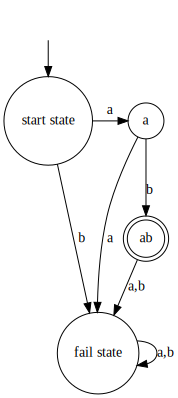

In [ ]:
ab = Digraph()
ab.attr(rankdir='TB') # This specifies the diagram should go top to bottom (this is the default)

# Start arrow
ab.node('', shape='none')
ab.edge('', 'start state')

# States
with ab.subgraph() as fail:
  fail.attr(rank='same')
  fail.node('fail state', shape='circle')
with ab.subgraph() as read:
  read.attr(rank='same')
  read.node('start state', shape='circle')
  read.node('1a', label='a', shape='circle')
with ab.subgraph() as accept:
  accept.attr(rank='same')
  accept.node('1a1b', label='ab',shape='doublecircle')

# Transitions
ab.edge('start state', 'fail state', label='b')
ab.edge('start state', '1a', label='a')
ab.edge('1a', '1a1b', label='b')
ab.edge('1a', 'fail state', label='a')
ab.edge('1a1b', 'fail state', label='a,b')
ab.edge('fail state', 'fail state', label='a,b')

Source(ab.source)

If we wanted a finite automata that recognized the two words $ab$ or $aabb$ we could do that too.

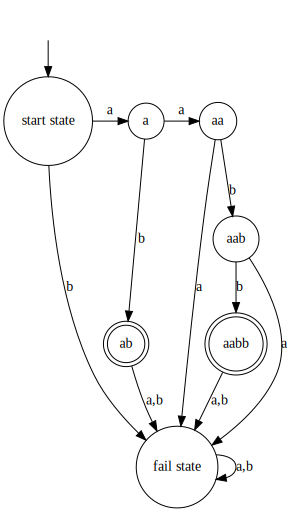

In [ ]:
aabb = Digraph()

# Start arrow
aabb.node('', shape='none')
aabb.edge('', 'start state')

# States
with aabb.subgraph() as fail:
  fail.attr(rank='same')
  fail.node('fail state', shape='circle')
with aabb.subgraph() as read:
  read.attr(rank='same')
  read.node('start state', shape='circle')
  read.node('1a', label='a', shape='circle')
  read.node('2a', label='aa', shape='circle')
with aabb.subgraph() as read2:
  read2.attr(rank='same')
  read2.node('2a1b', label = 'aab', shape='circle')
with aabb.subgraph() as accept:
  accept.attr(rank='same')
  accept.node('1a1b', label = 'ab', shape='doublecircle')
  accept.node('2a2b', label = 'aabb', shape='doublecircle')

# Transitions
aabb.edge('start state', '1a', label='a')
aabb.edge('start state', 'fail state', label='b')
aabb.edge('1a', '2a', label='a')
aabb.edge('1a', '1a1b', label='b')
aabb.edge('2a', 'fail state', label='a')
aabb.edge('2a', '2a1b', label='b')
aabb.edge('2a1b', 'fail state', label='a')
aabb.edge('2a1b', '2a2b', label='b')
aabb.edge('1a1b', 'fail state', label='a,b')
aabb.edge('2a2b', 'fail state', label='a,b')
aabb.edge('fail state', 'fail state', label='a,b')

Source(aabb.source)

In fact, for any finite $k$, if we wanted a finite automaton that recognized all words of the form $a^{n}b^{n}$ with $n \leq k$ that would be possible.

**NOTE** - The code below creates a local png file called "akbk.png" and then displays it. This is an attempt to prevent the image from being too large for the frame. If you'd rather view the image like the ones above, you can comment out the last two commands, and remove the comment from *Source(akbk.source)*.

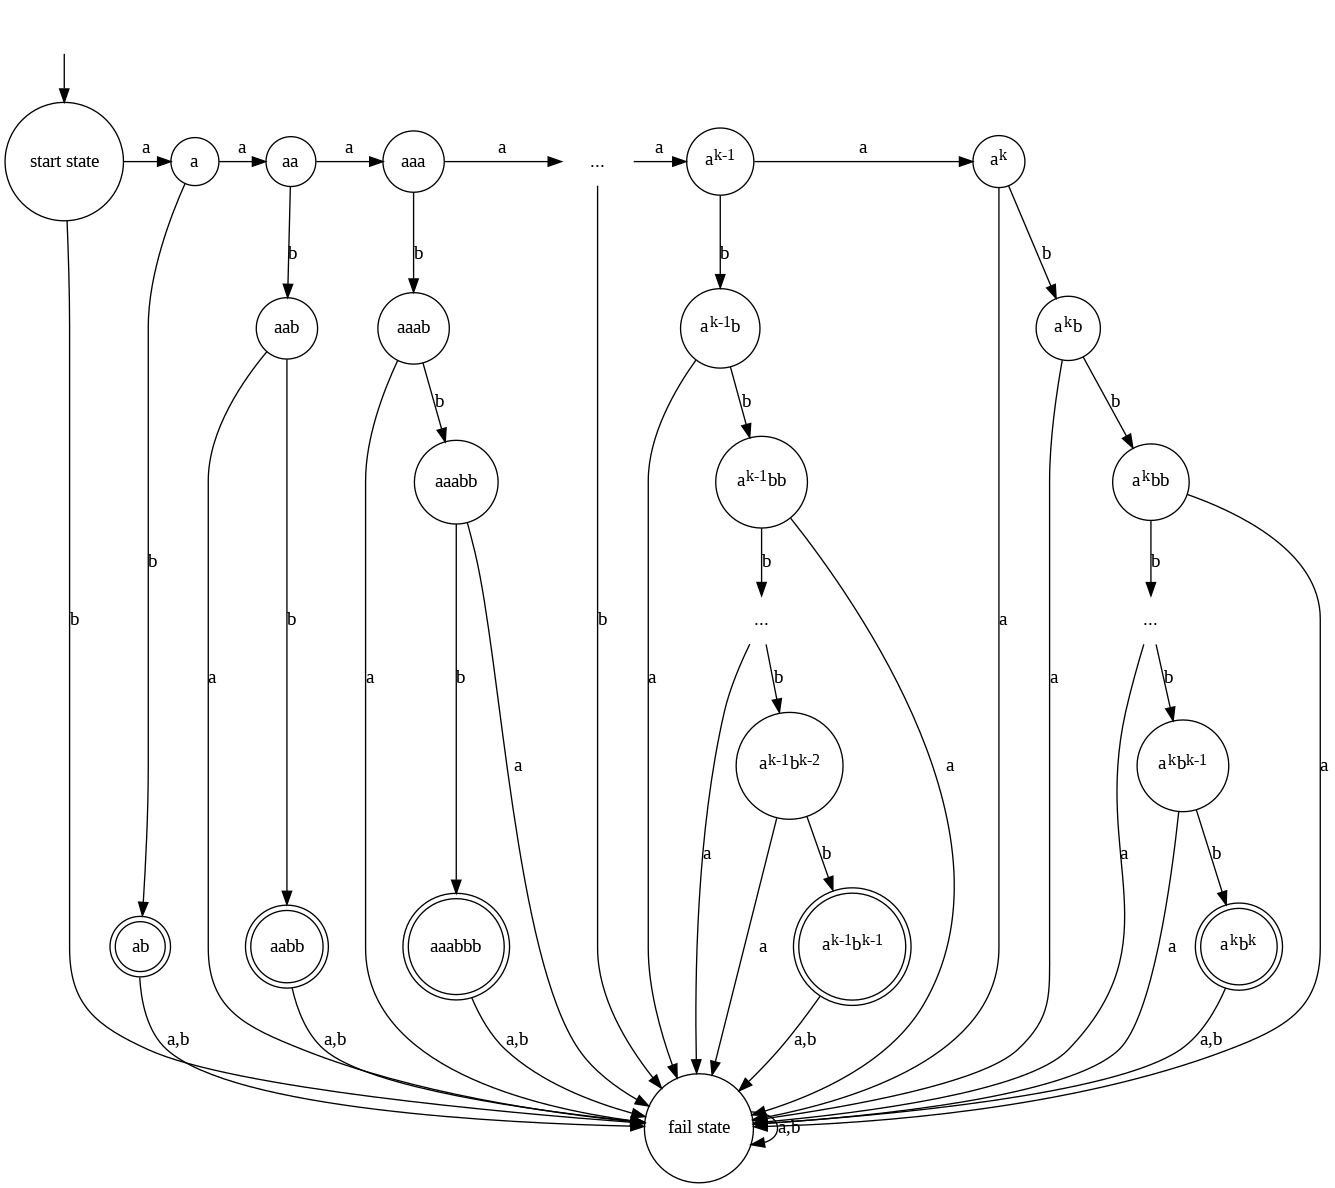

In [ ]:
akbk = Digraph()

# Start arrow
akbk.node('', shape='none')
akbk.edge('', 'start state')

# States
with akbk.subgraph() as fail:
  fail.attr(rank='same')
  fail.node('fail state', shape='circle')
with akbk.subgraph() as read:
  read.attr(rank='same')
  read.node('start state', shape='circle')
  read.node('1a', label='a', shape='circle')
  read.node('2a', label='aa', shape='circle')
  read.node('3a', label='aaa', shape='circle')
  read.node('ellipsis1', label='...', shape='plaintext')
  read.node('k-1a', label='<a<SUP>k-1</SUP>>', shape='circle')
  read.node('ka', label='<a<SUP>k</SUP>>', shape='circle')
with akbk.subgraph() as read2:
  read2.attr(rank='same')
  read2.node('2a1b', label='aab', shape='circle')
  read2.node('3a1b', label='aaab', shape='circle')
  read2.node('k-1a1b', label='<a<SUP>k-1</SUP>b>', shape='circle')
  read2.node('ka1b', label='<a<SUP>k</SUP>b>', shape='circle')
with akbk.subgraph() as read3:
  read3.attr(rank='same')
  read3.node('3a2b', label='aaabb', shape='circle')
  read3.node('k-1a2b', label='<a<SUP>k-1</SUP>bb>', shape='circle')
  read3.node('ka2b', label='<a<SUP>k</SUP>bb>', shape='circle')
with akbk.subgraph() as read4:
  read4.attr(rank='same')
  read4.node('ellipsis2', label='...', shape='plaintext')
  read4.node('ellipsis3', label='...', shape='plaintext')
with akbk.subgraph() as read5:
  read5.attr(rank='same')
  read5.node('k-1ak-2b', label='<a<SUP>k-1</SUP>b<SUP>k-2</SUP>>', shape='circle')
  read5.node('kak-1b', label='<a<SUP>k</SUP>b<SUP>k-1</SUP>>', shape='circle')
with akbk.subgraph() as accept:
  accept.attr(rank='same')
  accept.node('1a1b', label='ab', shape='doublecircle')
  accept.node('2a2b', label='aabb', shape='doublecircle')
  accept.node('3a3b', label='aaabbb', shape='doublecircle')
  accept.node('k-1ak-1b', label='<a<SUP>k-1</SUP>b<SUP>k-1</SUP>>', shape='doublecircle')
  accept.node('kakb', label='<a<SUP>k</SUP>b<SUP>k</SUP>>', shape='doublecircle')

# Transitions
akbk.edge('start state', '1a', label='a')
akbk.edge('start state', 'fail state', label='b')
akbk.edge('1a', '2a', label='a')
akbk.edge('1a', '1a1b', label='b')
akbk.edge('2a', '3a', label='a')
akbk.edge('2a', '2a1b', label='b')
akbk.edge('3a', 'ellipsis1', label='a')
akbk.edge('3a', '3a1b', label='b')
akbk.edge('ellipsis1', 'k-1a', label='a')
akbk.edge('ellipsis1', 'fail state', label='b')
akbk.edge('k-1a', 'ka', label='a')
akbk.edge('k-1a', 'k-1a1b', label='b')
akbk.edge('k-1a1b', 'fail state', label='a')
akbk.edge('k-1a1b', 'k-1a2b', label='b')
akbk.edge('k-1a2b', 'fail state', label='a')
akbk.edge('k-1a2b', 'ellipsis2', label='b')
akbk.edge('ellipsis2', 'fail state', label='a')
akbk.edge('ellipsis2', 'k-1ak-2b', label='b')
akbk.edge('k-1ak-2b', 'fail state', label='a')
akbk.edge('k-1ak-2b', 'k-1ak-1b', label='b')
akbk.edge('ka', 'fail state', label='a')
akbk.edge('ka', 'ka1b', label='b')
akbk.edge('2a1b', 'fail state', label='a')
akbk.edge('2a1b', '2a2b', label='b')
akbk.edge('3a1b', 'fail state', label='a')
akbk.edge('3a1b', '3a2b', label='b')
akbk.edge('3a2b', 'fail state', label='a')
akbk.edge('3a2b', '3a3b', label='b')
akbk.edge('ka1b', 'fail state', label='a')
akbk.edge('ka1b', 'ka2b', label='b')
akbk.edge('ka2b', 'fail state', label='a')
akbk.edge('ka2b', 'ellipsis3', label='b')
akbk.edge('ellipsis3', 'fail state', label='a')
akbk.edge('ellipsis3', 'kak-1b', label='b')
akbk.edge('kak-1b', 'fail state', label='a')
akbk.edge('kak-1b', 'kakb', label='b')
akbk.edge('1a1b', 'fail state', label='a,b')
akbk.edge('2a2b', 'fail state', label='a,b')
akbk.edge('3a3b', 'fail state', label='a,b')
akbk.edge('k-1ak-1b', 'fail state', label='a,b')
akbk.edge('kakb', 'fail state', label='a,b')
akbk.edge('fail state', 'fail state', label='a,b')

#Source(akbk.source)

akbk.render('akbk', format='png')

Image(filename='akbk.png', width=1000)

For any of these, the machine needs to "remember" the number of $a$'s it has read in order to make sure it then reads the same number of $b$'s, but only up to a finite number of $a$'s. So, the amount of memory it needs in order to remember the number of $a$'s is bounded, a.k.a *finite*.

However, suppose we wanted to build a finite automata that recognized all words of the form $a^{n}b^{n}$ for *any* possible value of $n$. Well, in this case there would be no bound on the number of $a$'s the machine might need to remember, and so there would be no bound on the amount of "memory" the machine would need to have. This, it turns out, is an insurmountable problem, and it's not possible to build a finite automaton that recognizes this language. In other words, the language

  $$L = \{a^{n}b^{n} | n \geq 0\}$$

is *not* a regular language, and therefore nonregular languages exist. This explanation is meant to be intuitive, and is not a formal proof. We'll return and give a formal proof later in this section.

## 2. The Pigeonhole Principle

The proof that the language $L = \{a^{n}b^{n} | n \geq 0\}$ is nonregular will rely on something called *the pumping lemma*, which fundamentally relies upon *the pigeonhole principle* - one of the most fundamentally straightforward ideas in mathematics, that nevertheless is at the heart of many deep and nonobvious results.

The pigeonhole principle states that if you have more items than categories to put them in, at least one category must contain more than one item. The reason it's called the "pigeonhole principle" is that if you've got a set of pigeons (your items), and you must put them all into holes (your categories), then if you've got more pigeons than holes at least one hole must have more than one pigeon. It's a particular example of the general property.

```{figure} ./PigeonsInHoles.jpg
:alt: Pigeons In Holes
:name: fig:PigeonsInHoles
:width: 500px
:align: center
```

As another example, suppose you're at the grocery store and you've got three fruits and two bags, and you need to put the fruits into the bags. At least one of those bags will have more than one fruit in it. I'm sure you can easily come up with other examples.

## 3. The Pumping Lemma  

Suppose we have a finite automaton with $5$ states, and we provide it with the input string $aaaaa$. Suppose it starts in state $s_{0}$, transitions to state $s_{2}$ after reading the first $a$, transitions to $s_{4}$ after reading the second $a$, transitions to $s_{3}$ after reading the third  $a$, and then transitions to $s_{1}$ after reading the fourth $a$.

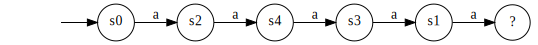

In [ ]:
fullcycle = Digraph()
fullcycle.attr(rankdir='LR')

# Start arrow
fullcycle.node('', shape='none')
fullcycle.edge('', 's0')

#States
fullcycle.node('s0', label = '<s<SUB>0</SUB>>', shape='circle')
fullcycle.node('s1', label = '<s<SUB>1</SUB>>', shape='circle')
fullcycle.node('s2', label = '<s<SUB>2</SUB>>', shape='circle')
fullcycle.node('s3', label = '<s<SUB>3</SUB>>', shape='circle')
fullcycle.node('s4', label = '<s<SUB>4</SUB>>', shape='circle')
fullcycle.node('s5', label = '?', shape='circle')

# Transitions
fullcycle.edge('s0', 's2', label='a')
fullcycle.edge('s2', 's4', label='a')
fullcycle.edge('s4', 's3', label='a')
fullcycle.edge('s3', 's1', label='a')
fullcycle.edge('s1', 's5', label='a')

Source(fullcycle.source)

It has now been in each of its possible states, and when it reads the fifth $a$ it has no choice but to return to a state in which it's already been.

Generalizing, suppose we have a finite automaton with $N$ states, and we provide it an input string $s$ with $N$ or more characters. As it reads each character from the input, the finite automaton transitions accordingly. After reading $k$ characters the finite automaton has been in at most $k+1$ distinct states (remember it begins in the start state before reading any characters), and after it reads $N$ characters it must, by the pigeonhole principle, have been in at least one state more than one time.

In other words, while reading $N$ input characters, the finite automaton must at some point *loop back* to a previous state. We can illustrate this with a diagram like the one below, where each circle in the diagram represents a state of the finite automaton as it reads its input, and each arrow represents a transition after reading an input character:

There is a sequence of transitions before it reaches the loop, and then a sequence of transitions as it goes around the loop, and then a sequence of transitions after the loop. Each of these transitions corresponds with a character read from the input string, and we can similarly break the input string into three sections:

  $$s = \underbrace{c_{1}c_{2} \cdots c_{k-1}}_{\text{Before the loop}}\underbrace{c_{k}c_{k+1}c_{k+2} \cdots c_{l-3}c_{l-2}c_{l-1}}_{\text{The loop}}\underbrace{c_{l}c_{l+1} \cdots c_{N}}_{\text{After the loop}}$$

Now, if we were to change the input string by inserting another loop sequence after the first it would loop like:

  $$s' = \underbrace{c_{1}c_{2} \cdots c_{k-1}}_{\text{Before the loop}}\underbrace{c_{k}c_{k+1}c_{k+2} \cdots c_{l-3}c_{l-2}c_{l-1}}_{\text{Loop 1}}\underbrace{c_{k}c_{k+1}c_{k+2} \cdots c_{l-3}c_{l-2}c_{l-1}}_{\text{Loop 2}}\underbrace{c_{l}c_{l+1} \cdots c_{N}}_{\text{After the loop}}$$,

and if this were given to the finite automaton as input it would go around the state loop twice but end up at exactly the same final state after reading the entire string.

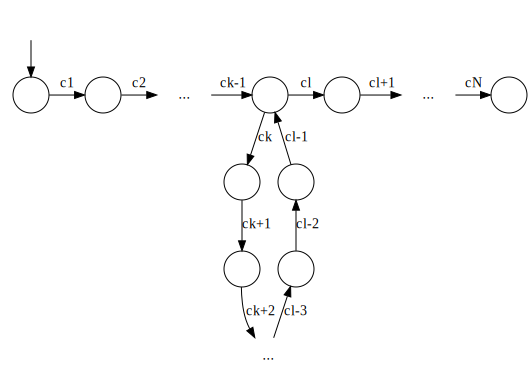

In [ ]:
loop = Digraph()

# Start arrow
loop.node('', shape='none')
loop.edge('', 's0')

# States
with loop.subgraph() as lev1:
  lev1.attr(rank='same')
  lev1.node('s0', label = '', shape='circle')
  lev1.node('s1', label = '', shape='circle')
  lev1.node('ellipsis1', label='...', shape='plaintext')
  lev1.node('sk', label = '', shape='circle')
  lev1.node('sl', label = '', shape='circle')
  lev1.node('ellipsis3', label='...', shape='plaintext')
  lev1.node('sN', label = '', shape='circle')
with loop.subgraph() as lev2:
  lev2.attr(rank='same')
  lev2.node('sk+1', label = '', shape='circle')
  lev2.node('sl-1', label = '', shape='circle')
with loop.subgraph() as lev3:
  lev3.attr(rank='same')
  lev3.node('sk+2', label = '', shape='circle')
  lev3.node('sl-2', label = '', shape='circle')
with loop.subgraph() as lev4:
  lev4.attr(rank='same')
  lev4.node('ellipsis2', label='...', shape='plaintext')

# Transitions
loop.edge('s0', 's1', label='<c<SUB>1</SUB>>')
loop.edge('s1', 'ellipsis1', label='<c<SUB>2</SUB>>')
loop.edge('ellipsis1', 'sk', label='<c<SUB>k-1</SUB>>')
loop.edge('sk', 'sk+1', label='<c<SUB>k</SUB>>')
loop.edge('sk+1', 'sk+2', label='<c<SUB>k+1</SUB>>')
loop.edge('sk+2', 'ellipsis2', label='<c<SUB>k+2</SUB>>')
loop.edge('ellipsis2', 'sl-2', label='<c<SUB>l-3</SUB>>')
loop.edge('sl-2', 'sl-1', label='<c<SUB>l-2</SUB>>')
loop.edge('sl-1', 'sk', label='<c<SUB>l-1</SUB>>')
loop.edge('sk', 'sl', label='<c<SUB>l</SUB>>')
loop.edge('sl', 'ellipsis3', label='<c<SUB>l+1</SUB>>')
loop.edge('ellipsis3', 'sN', label='<c<SUB>N</SUB>>')

Source(loop.source)

If the final state after reading $s$ were an accepting state, then the final state would be that same accepting state after reading $s'$. If the final state after reading $s$ were not an accepting state, then the final state would be that same non-accepting state after reading $s'$. In other words, $s'$ is a word in the language recognized by our finite automaton if and only if $s$ is. This is the fundamental idea behind the *pumping lemma*.

---

**The Pumping Lemma** - If a finite automaton has $N$ states and $w$ is a word in the language recognized by the finite automaton with $len(w) \geq N$, then $w$ can be written as

  $$w = xyz$$

where $x,y,z$ are substrings of $w$, $len(xy) < N$, $len(y) > 0$, and every string of the form

  $$xy^{n}z$$

is *also* a word in the language recognized by the finite automaton.

---

The pumping lemma is a powerful tool for proving a language is not regular.

## 4. Proof that $L = \{a^{n}b^{n} | n \geq 0\}$ is not regular.

We'll now use the pumping lemma to prove the language $L = \{a^{n}b^{n} | n \geq 0\}$ introduced in Section 1.6.1 is not regular.

Suppose $L$ were regular. Then there would be some finite automaton that recognized it, and this finite automaton would have some finite number of states. Suppose this finite number of states is $N$.

Take the string $w = a^{N+1}b^{N+1}$. This is a word in $L$, and by the pumping lemma we can write $w$ as $a^{j}a^{k}a^{l}b^{N+1}$, where $j + k + l = N+1$, $k > 0$, $a^{j}$ corresponds with $x$ from the pumping lemma, $a^{k}$ corresponds with $y$, and $a^{l}b^{N+1}$ corresponds with $z$. In this case by the pumping lemma the string $a^{j}(a^{k})^{2}a^{l}b^{N+1} = a^{N+1+k}b^{N+1}$ must also be a word in $L$. However, as $k > 0$ this doesn't have the right form to be a word in $L$, and thus we have a contradiction. Because we have a contradiction, our original assumption - that $L$ is a regular language - must be false.

## 5. Practice Exercises

**Exercise 1**: Prove that the language $L = \{a^{n}b^{n+1} | n \geq 0\}$ is not regular.

**Exercise 2**: Prove that the language $L = \{a^{n}b^{2n} | n \geq 0\}$ is not regular.

**Exercise 3**: Prove that the language $L = \{a^{n}b^{n}a^{m} | n,m \geq 0\}$ is not regular.

## 6. Further Reading

* [Introduction to Computer Theory](https://www.amazon.com/Introduction-Computer-Theory-Daniel-Cohen/dp/0471137723) (Second Edition) by Daniel I.A. Cohen

  *Chapter 10 - Nonregular Language*

* [Automata Theory, Languages, and Computation](https://www.amazon.com/Introduction-Automata-Theory-Languages-Computation/dp/0321462254) (Third Edition) by Hopcroft, Motwani, and Ullman

  *Section 4.1 - Proving Languages Not to Be Regular*

* [Introduction to the Theory of Computation](https://www.cengage.com/c/introduction-to-the-theory-of-computation-3e-sipser/9781133187790/) (Third Edition) by Michael Sipser
  
  *Section 1.4 - Nonregular Languages*

* [What is the Pumping Lemma](https://youtu.be/qtnNyUlO6vU?si=lv7g5JMLkWvzz-OX) Video from Lydia on Youtube